# Análise Exploratória dos Dados

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from scipy.stats import f_oneway

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

In [2]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

## Conhecendo o Dataset

In [3]:
df_train.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,382,527359050,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,7,5,1976,1976,Gable,CompShg,HdBoard,HdBoard,BrkFace,189.0,TA,TA,CBlock,Gd,TA,No,Unf,0.0,Unf,0.0,1090.0,1090.0,GasA,TA,Y,SBrkr,1370,0,0,1370,0.0,0.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,479.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,6,2009,WD,Family,152000
1,835,906475070,60,RL,NaN,28698,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,2Story,5,5,1967,1967,Flat,Tar&Grv,Plywood,Plywood,NaN,0.0,TA,TA,PConc,TA,Gd,Gd,LwQ,249.0,ALQ,764.0,0.0,1013.0,GasA,TA,Y,SBrkr,1160,966,0,2126,0.0,1.0,2,1,3,1,TA,7,Min2,0,NaN,Attchd,1967.0,Fin,2.0,538.0,TA,TA,Y,486,0,0,0,225,0,NaN,NaN,NaN,0,6,2009,WD,Abnorml,185000
2,1899,534429030,90,RL,70.0,9842,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,Duplex,1Story,4,5,1962,1962,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,1224,0,0,1224,0.0,0.0,2,0,2,2,TA,6,Typ,0,NaN,CarPort,1962.0,Unf,2.0,462.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal,101800
3,679,535451170,90,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,4,5,1949,1950,Gable,CompShg,BrkFace,Stone,NaN,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Wall,Fa,N,FuseF,1040,0,0,1040,0.0,0.0,2,0,2,2,TA,6,Typ,0,NaN,Detchd,1956.0,Unf,2.0,420.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,90000
4,701,902109130,190,RM,63.0,7627,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Artery,Norm,2fmCon,2Story,4,6,1920,1950,Gable,CompShg,AsbShng,AsbShng,NaN,0.0,Fa,TA,BrkTil,Fa,Po,No,Unf,0.0,Unf,0.0,600.0,600.0,GasA,Gd,N,SBrkr,1101,600,0,1701,0.0,0.0,2,0,4,2,Fa,8,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,148,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,94550


In [4]:
df_train.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2344.000000,2.344000e+03,2344.000000,1951.000000,2344.000000,2344.00000,2344.000000,2344.000000,2344.000000,2325.000000,2343.000000,2343.000000,2343.000000,2343.000000,2344.000000,2344.000000,2344.000000,2344.000000,2343.000000,2343.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2222.00000,2343.000000,2343.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000
mean,1464.298635,7.143632e+08,57.308020,69.207586,10127.857509,6.06442,5.581911,1970.506826,1983.923635,98.539785,442.531370,50.097311,554.393513,1047.022194,1154.814420,333.688140,4.357082,1492.859642,0.431498,0.059326,1.557167,0.370734,2.845137,1.043089,6.409130,0.598976,1977.39829,1.746906,469.078959,94.113055,47.341724,24.731655,2.422782,16.010239,2.582765,58.055034,6.184727,2007.794795,178582.207765
std,842.982263,1.886907e+08,42.802555,23.418018,8050.908132,1.38852,1.105659,30.341434,20.786287,172.239113,452.223224,170.396999,433.788333,436.567117,385.114269,427.141191,44.323993,504.619676,0.525505,0.241644,0.552162,0.499608,0.820352,0.211339,1.563651,0.652987,25.67911,0.746445,212.432786,124.851870,68.037465,67.030943,24.524362,55.820882,38.324145,623.375121,2.708408,1.315117,77125.072713
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.00000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,737.750000,5.284821e+08,20.000000,58.000000,7466.500000,5.00000,5.000000,1953.000000,1965.000000,0.000000,0.000000,0.000000,218.000000,784.000000,879.750000,0.000000,0.000000,1121.750000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.00000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129000.000000
50%,1466.000000,5.354541e+08,50.000000,68.000000,9356.500000,6.00000,5.000000,1972.000000,1992.000000,0.000000,375.000000,0.000000,462.000000,988.000000,1082.000000,0.000000,0.000000,1436.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.00000,2.000000,476.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2195.250000,9.071921e+08,70.000000,80.000000,11484.250000,7.00000,6.000000,2000.000000,2003.000000,160.000000,734.000000,0.000000,795.500000,1288.000000,1378.000000,701.000000,0.000000,1734.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.00000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,210000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,215245.000000,10.00000,9.000000,2010.000000,2010.000000,1290.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.00000,4.000000,1488.000000,870.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [5]:
# porcentagem de nulos
count_nans = df_train.isna().mean()
count_nans[count_nans > 0.1]

Lot Frontage    0.167662
Alley           0.930887
Mas Vnr Type    0.608362
Fireplace Qu    0.488055
Pool QC         0.994881
Fence           0.799488
Misc Feature    0.959898
dtype: float64

In [6]:
count_numeric_columns = int(df_train.dtypes.apply(pd.api.types.is_numeric_dtype).sum())
print(f"Quantidade de colunas numéricas: {count_numeric_columns}")

Quantidade de colunas numéricas: 39


### Observações
- As colunas Order e PID parecem servir com o único propósito de identificação dos dados, portanto, podem ser descartadas.
- Um total de 7 features apresentam mais do que 10% de valores nulos, sendo 3 com mais de 90%.
- Apenas 39 das 82 colunas são numéricas, as demais são categóricas.
- Um total de 24 variáveis categóricas apresentam ordinalidade e podem ser convertidas para valores numéricos.

## Transformação de variáveis categóricas ordinais / binárias

Fiz um mapeamento manual das variáveis categóricas ordinais e criei um mapeamento para convertê-las em numéricas.

In [7]:
mapping = {
    "Street": {"Pave": 0, "Grvl": 1, np.nan: 2},
    "Alley": {"Pave": 0, "Grvl": 1, np.nan: 2},
    "Lot Shape": {"Reg": 0, "IR1": 1, "IR2": 2, "IR3": 3, np.nan: 4},
    "Land Contour": {"Lvl": 0, "Bnk": 1, "HLS": 2, "Low": 3, np.nan: 4},
    "Utilities": {"AllPub": 0, "NoSewr": 1, "NoSeWa": 2, "ELO": 3, np.nan: 4},
    "Land Slope": {"Gtl": 0, "Mod": 1, "Sev": 2, np.nan: 3},
    "Exter Qual": {"Ex": 0, "Gd": 1, "TA": 2, "Fa": 3, "Po": 4, np.nan: 5},
    "Exter Cond": {"Ex": 0, "Gd": 1, "TA": 2, "Fa": 3, "Po": 4, np.nan: 5},
    "Bsmt Qual": {"Ex": 0, "Gd": 1, "TA": 2, "Fa": 3, "Po": 4, np.nan: 5},
    "Bsmt Cond": {"Ex": 0, "Gd": 1, "TA": 2, "Fa": 3, "Po": 4, np.nan: 5},
    "Bsmt Exposure": {"Gd": 0, "Av": 1, "Mn": 2, "No": 3, np.nan: 4},
    "BsmtFin Type 1": {"GLQ": 0, "ALQ": 1, "BLQ": 2, "Rec": 3, "LwQ": 4, "Unf": 5, np.nan: 6},
    "BsmtFin Type 2": {"GLQ": 0, "ALQ": 1, "BLQ": 2, "Rec": 3, "LwQ": 4, "Unf": 5, np.nan: 6},
    "Heating QC": {"Ex": 0, "Gd": 1, "TA": 2, "Fa": 3, "Po": 4, np.nan: 5},
    "Central Air": {"Y": 1, "N": 0, np.nan: -1},
    "Kitchen Qual": {"Ex": 0, "Gd": 1, "TA": 2, "Fa": 3, "Po": 4, np.nan: 5},
    "Functional": {"Typ": 0, "Min1": 1, "Min2": 2, "Mod": 3, "Maj1": 4, "Maj2": 5, "Sev": 6, "Sal": 7, np.nan: 8},
    "Fireplace Qu": {"Ex": 0, "Gd": 1, "TA": 2, "Fa": 3, "Po": 4, np.nan: 5},
    "Garage Finish": {"Fin": 0, "RFn": 1, "Unf": 2, np.nan: 3},
    "Garage Qual": {"Ex": 0, "Gd": 1, "TA": 2, "Fa": 3, "Po": 4, np.nan: 5},
    "Garage Cond": {"Ex": 0, "Gd": 1, "TA": 2, "Fa": 3, "Po": 4, np.nan: 5},
    "Paved Drive": {"Y": 0, "P": 1, "N": 2},
    "Pool QC": {"Ex": 0, "Gd": 1, "TA": 2, "Fa": 3, "Po": 4, np.nan: 5},
    "Fence": {"GdPrv": 0, "MnPrv": 1, "GdWo": 2, "MnWw": 3, np.nan: 4},
}

In [8]:
for col in mapping:
    df_train[col] = df_train[col].map(mapping[col]).astype(int)
    df_test[col] = df_test[col].map(mapping[col]).astype(int)

In [9]:
count_numeric_columns = int(df_train.dtypes.apply(pd.api.types.is_numeric_dtype).sum())
print(f"Quantidade de colunas numéricas: {count_numeric_columns}")

Quantidade de colunas numéricas: 63


In [10]:
df_train = df_train.drop(columns=["Order", "PID"])
df_test = df_test.drop(columns=["Order", "PID"])

## Análise bivariada

### Checando correlação das variáveis numéricas com o Target

<Axes: >

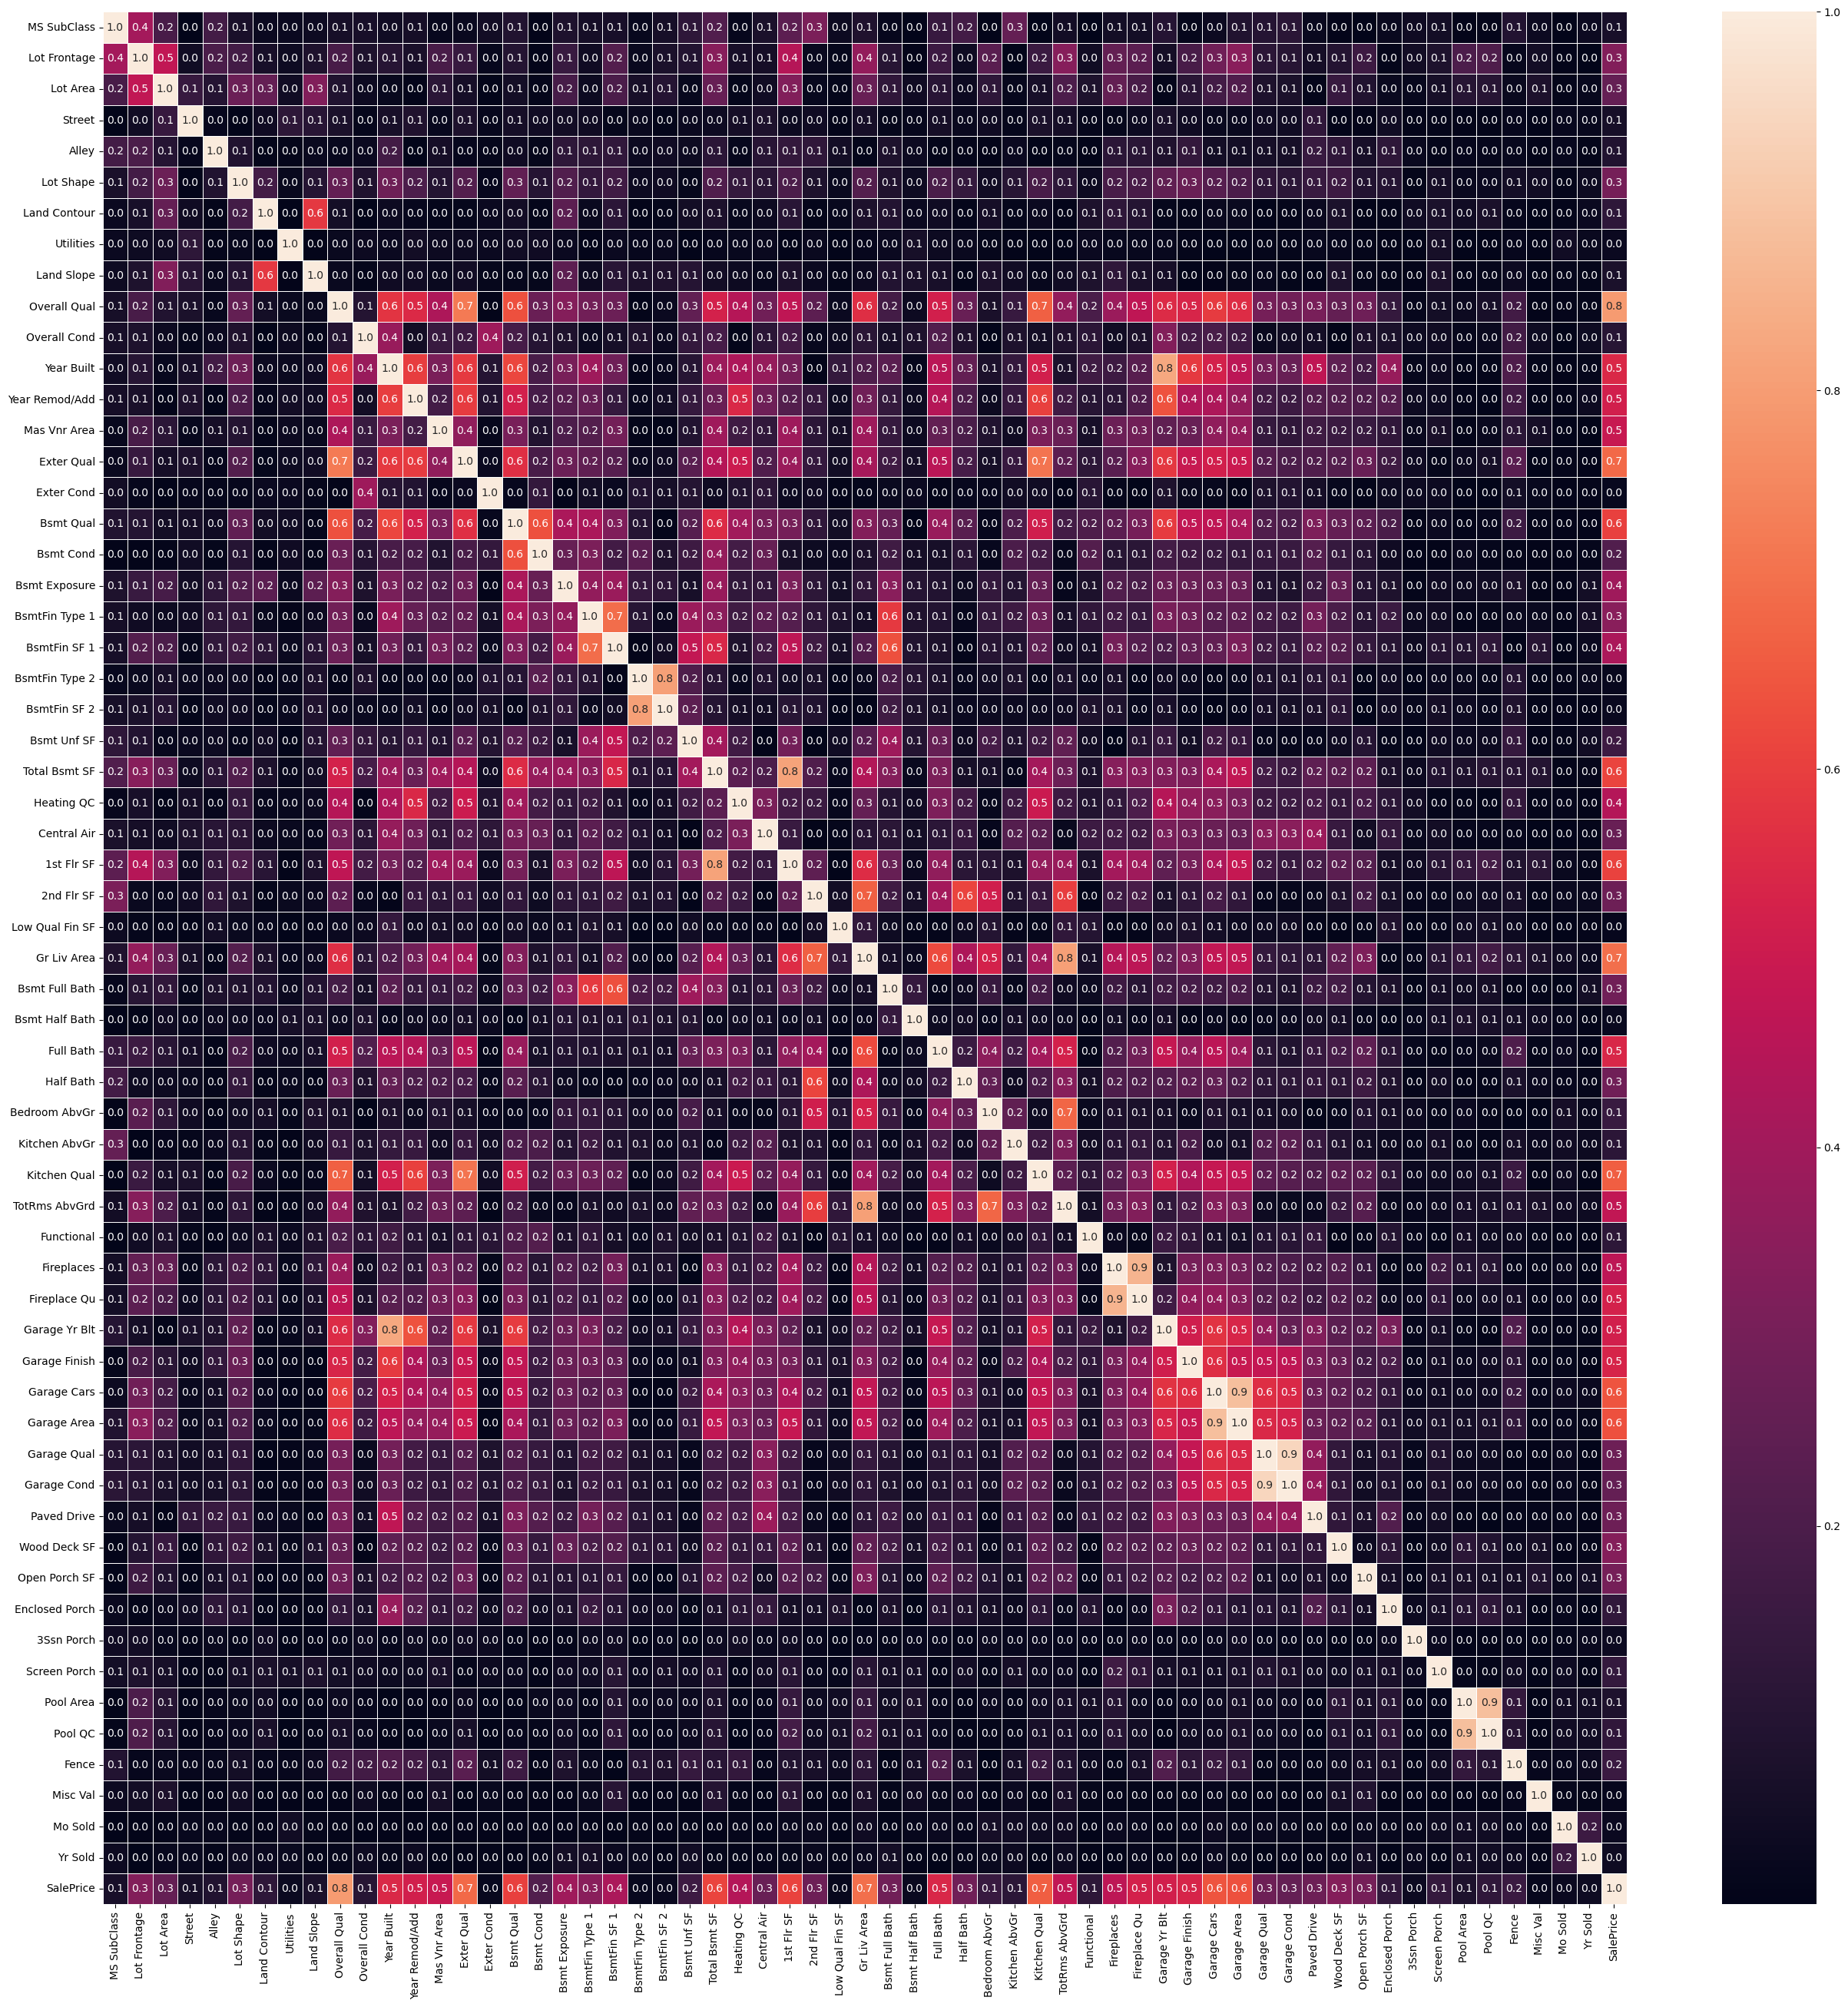

In [11]:
plt.figure(figsize=(32, 32))
sns.heatmap(df_train.corr(numeric_only=True).abs(), annot = True, fmt=".1f", linewidths=.6)

A última linha mostra a correlação do Alvo com todas as demais variáveis.
Vemos que algumas variáveis estão bem correlacionadas como:
- Overall Qual
- Gr Liv Area
- Bsmt Qual
- Garage Cars
- Garage Area

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

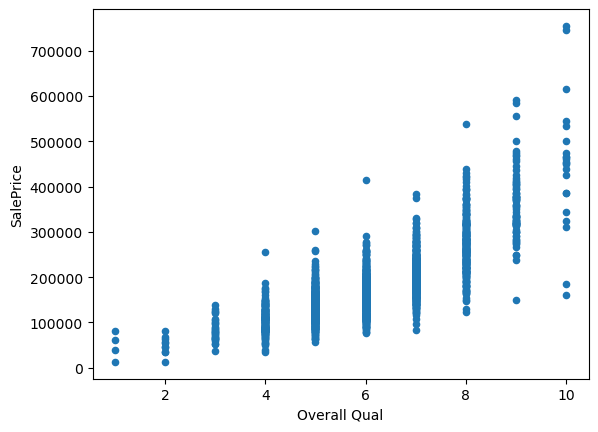

In [12]:
df_train.plot.scatter(x="Overall Qual", y="SalePrice")

A variável _Overall Qual_ representa a qualidade geral dos materiais usados na construção da casa, como é de se esperar tem forte correlação com o preço.

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

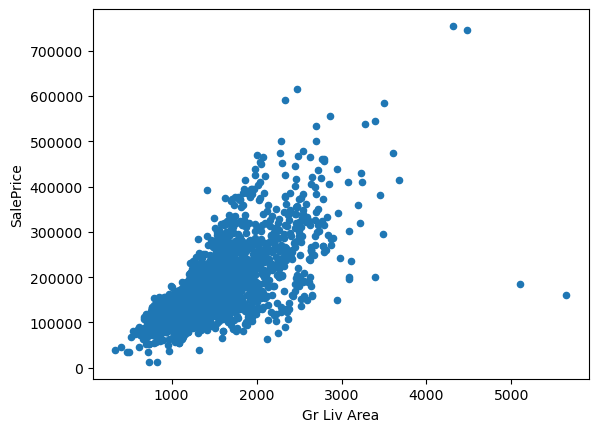

In [13]:
df_train.plot.scatter(x="Gr Liv Area", y="SalePrice")

A área habitável também apresenta boa correlação com o preço.

### Checando correlação das variáveis categóricas com o Target

In [14]:
cols = list(df_train.select_dtypes(include="object")) + ["SalePrice"]
df_train[cols].head()

,MS Zoning,Lot Config,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Foundation,Heating,Electrical,Garage Type,Misc Feature,Sale Type,Sale Condition,SalePrice
0,RL,Inside,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,BrkFace,CBlock,GasA,SBrkr,Attchd,NaN,WD,Family,152000
1,RL,CulDSac,ClearCr,Norm,Norm,1Fam,2Story,Flat,Tar&Grv,Plywood,Plywood,NaN,PConc,GasA,SBrkr,Attchd,NaN,WD,Abnorml,185000
2,RL,FR2,NAmes,Norm,Norm,Duplex,1Story,Gable,CompShg,HdBoard,HdBoard,NaN,Slab,GasA,SBrkr,CarPort,NaN,WD,Normal,101800
3,RL,Inside,NAmes,Norm,Norm,Duplex,1Story,Gable,CompShg,BrkFace,Stone,NaN,Slab,Wall,FuseF,Detchd,NaN,WD,Normal,90000
4,RM,Corner,OldTown,Artery,Norm,2fmCon,2Story,Gable,CompShg,AsbShng,AsbShng,NaN,BrkTil,GasA,SBrkr,NaN,NaN,WD,Normal,94550


<Axes: >

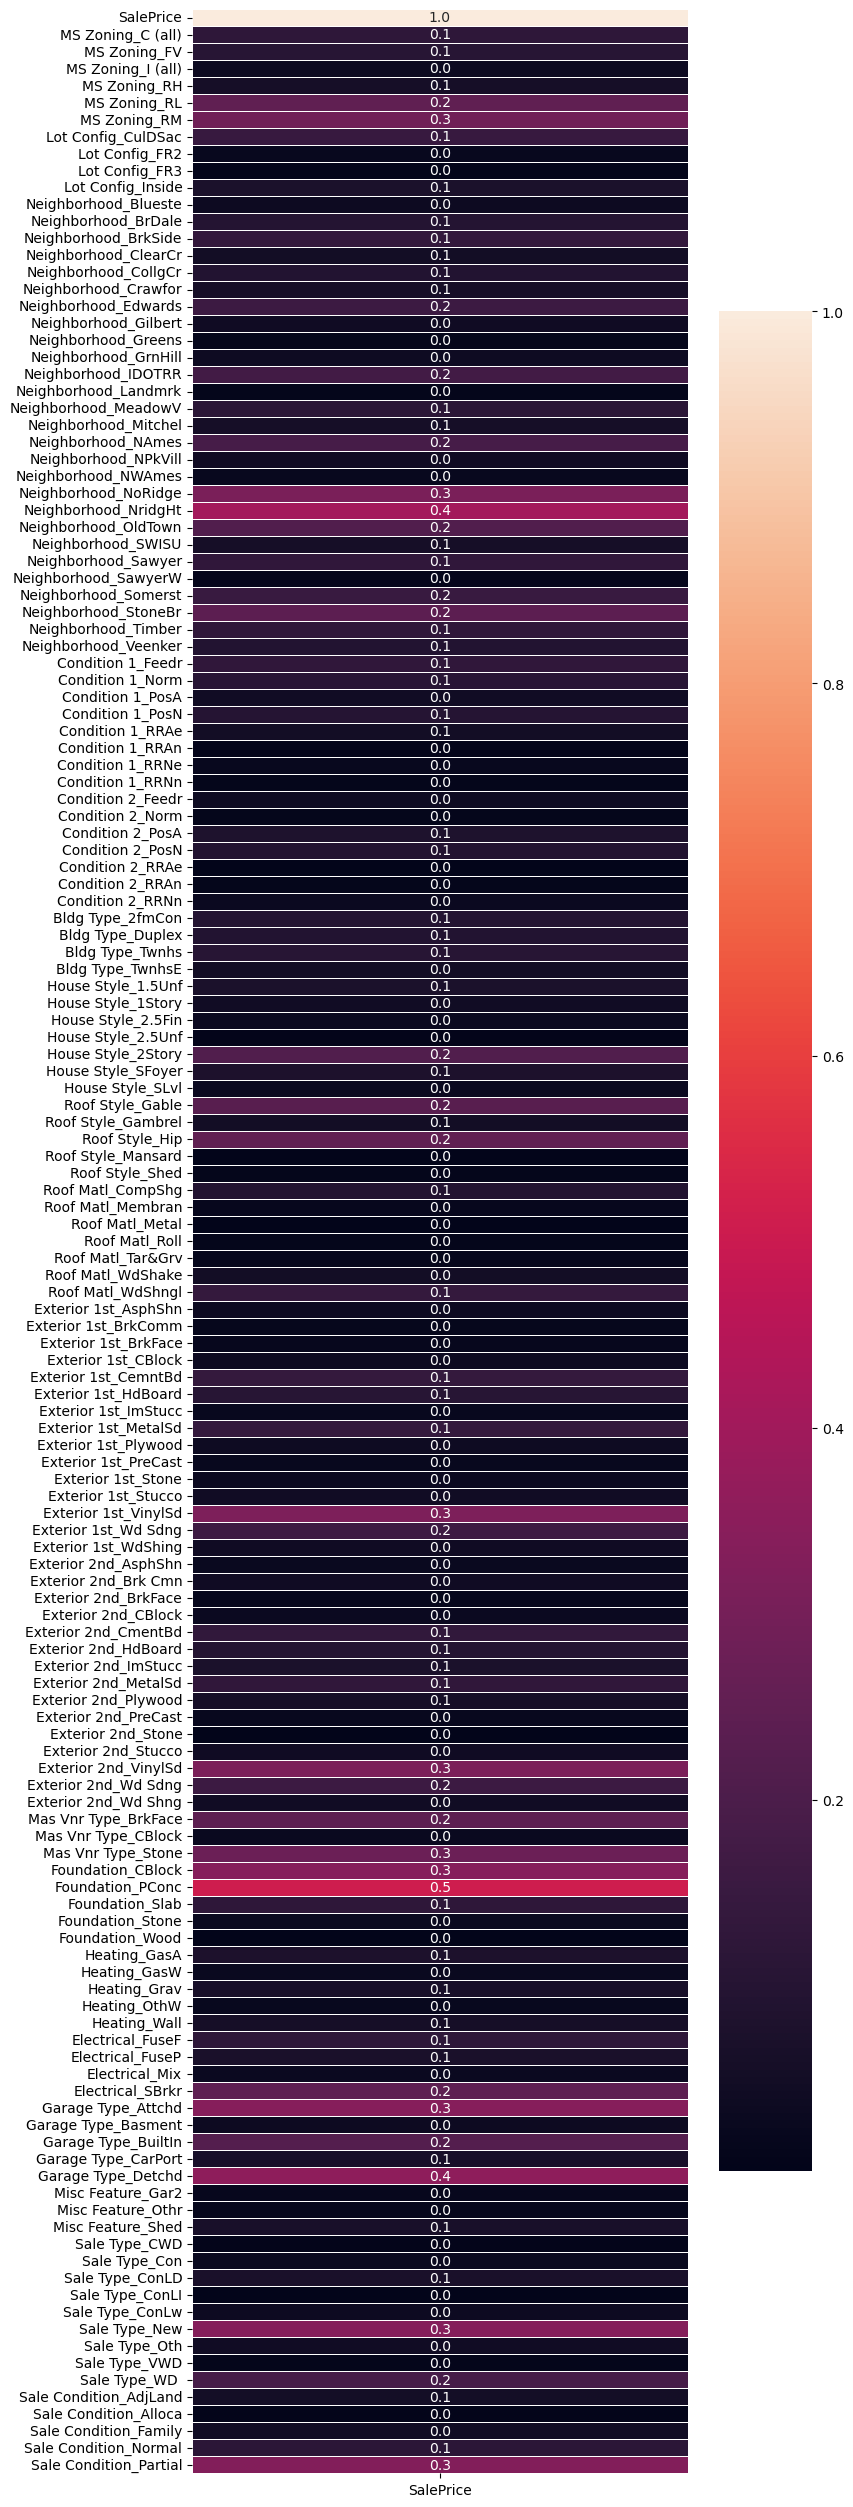

In [15]:
df = pd.get_dummies(df_train[cols], columns=cols[:-1], drop_first=True)
plt.figure(figsize=(8, 32))
sns.heatmap(df.corr(numeric_only=True)[["SalePrice"]].abs(), annot = True, fmt=".1f", linewidths=.6)

### Aplicando o teste estátistico ANOVA

In [16]:
for col in cols[:-1]:
    unique_values = df_train[col].unique()
    df = df_train[[col, "SalePrice"]]
    groups = [df[df[col] == value]["SalePrice"] for value in unique_values if df[df[col] == value]["SalePrice"].shape[0] > 1]
    f_stat, p_value = f_oneway(*groups)
    print(f"{col:20s} - F={f_stat:6.2f}, p={p_value:.4f}")

MS Zoning            - F= 60.84, p=0.0000
Lot Config           - F= 13.16, p=0.0000
Neighborhood         - F=113.25, p=0.0000
Condition 1          - F= 12.93, p=0.0000
Condition 2          - F= 10.25, p=0.0000
Bldg Type            - F= 19.32, p=0.0000
House Style          - F= 25.80, p=0.0000
Roof Style           - F= 31.70, p=0.0000
Roof Matl            - F= 17.44, p=0.0000
Exterior 1st         - F= 33.14, p=0.0000
Exterior 2nd         - F= 29.71, p=0.0000
Mas Vnr Type         - F= 27.68, p=0.0000
Foundation           - F=174.40, p=0.0000
Heating              - F=  5.05, p=0.0005
Electrical           - F= 49.07, p=0.0000
Garage Type          - F=112.48, p=0.0000
Misc Feature         - F=  0.04, p=0.9621
Sale Type            - F= 42.44, p=0.0000
Sale Condition       - F= 66.86, p=0.0000


### Observações

A comparação dos grupos de cada variável categórica parece ter diferença significativa no valor médio de venda de cada grupo. Com exceção do _Misc Feature_ que inicialmente tinha apresentado muitos valores nulos, portanto, essa variável deverá ser desconsiderada.